In [1]:
import torch
import math
from torch import Tensor
import matplotlib.pyplot as plt 

# imports from this same folder
import loadData
import baseline
import optim
import modules
import trainAndTest

In [2]:
torch.manual_seed(40)
print('Pytorch version: ',torch.__version__)
PLOT_FOLDER = 'plot_folder/'

Pytorch version:  0.3.1.post2


In [3]:
# Generate data with target 0 if outside the circle or 1 if inside
train_input, train_target = loadData.generate_disc_set(1000)
test_input, test_target = loadData.generate_disc_set(1000)

# see if data are close to be balanced and plot the dataset
loadData.plot_data(train_input, train_target, show_plot = False)

# check what accuracy we could expect with a simple baseline
# e.g. with a linear classifier after having added the L2 norm of the points
baseline.baseline_linear_model(train_input,train_target,test_input,test_target)

# convert targets to one-hot encoding
train_target = loadData.convert_to_one_hot(train_target)
test_target  = loadData.convert_to_one_hot(test_target)
print('Targets converted to one-hot')

# Normalize inplace the data
loadData.normalize_data(train_input)
loadData.normalize_data(test_input)

    

#samples:        torch.Size([1000, 2])
Are the classes balanced?
#true_samples:   torch.Size([504, 2])
#false_samples:  torch.Size([496, 2])
Baseline accuracy: 98.9 %
Targets converted to one-hot


100%|██████████| 1000/1000 [00:04<00:00, 231.20it/s]


optimizer:  SGD
learning rate:  0.002
minimum loss:  100.52349328994751
maximum accuracy:  690
On test:  686


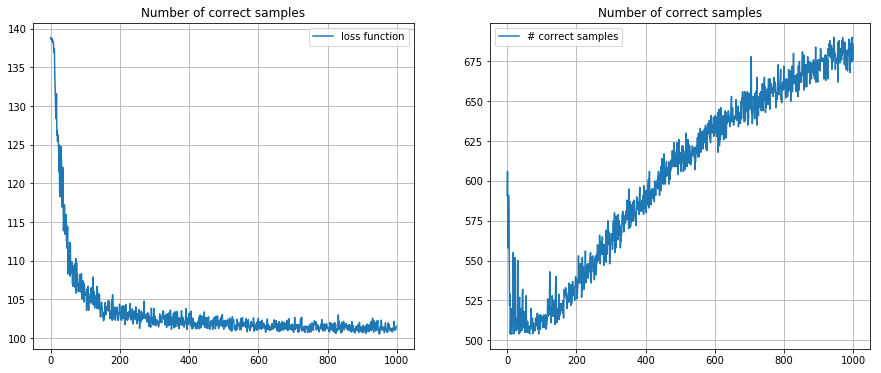

100%|██████████| 1000/1000 [00:04<00:00, 226.23it/s]


optimizer:  SGDmom
learning rate:  0.0015
minimum loss:  40.85367715358734
maximum accuracy:  970
On test:  948


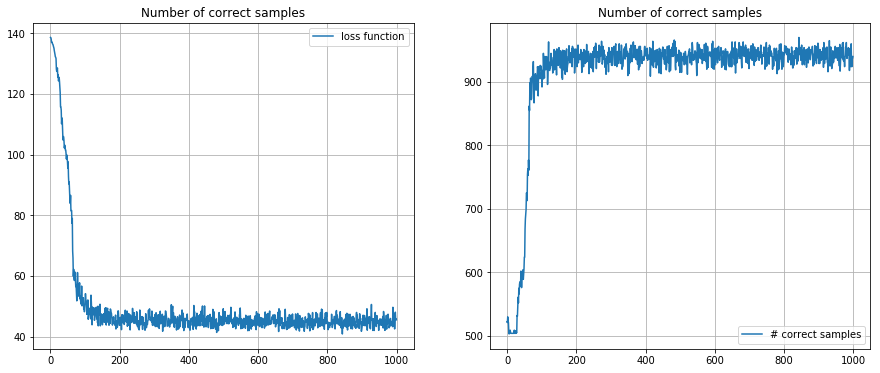

100%|██████████| 1000/1000 [00:09<00:00, 104.27it/s]


optimizer:  Adam
learning rate:  0.002
minimum loss:  13.112863630056381
maximum accuracy:  1000
On test:  963


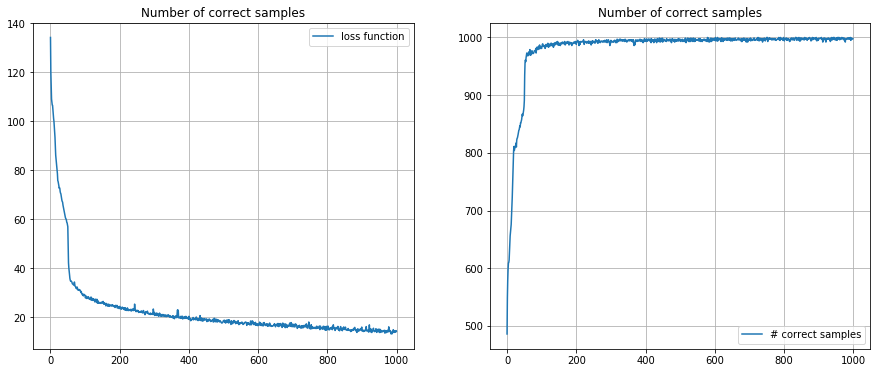

100%|██████████| 1000/1000 [00:06<00:00, 163.03it/s]


optimizer:  BFGS
learning rate:  0.002
minimum loss:  111.66182041168213
maximum accuracy:  614
On test:  588


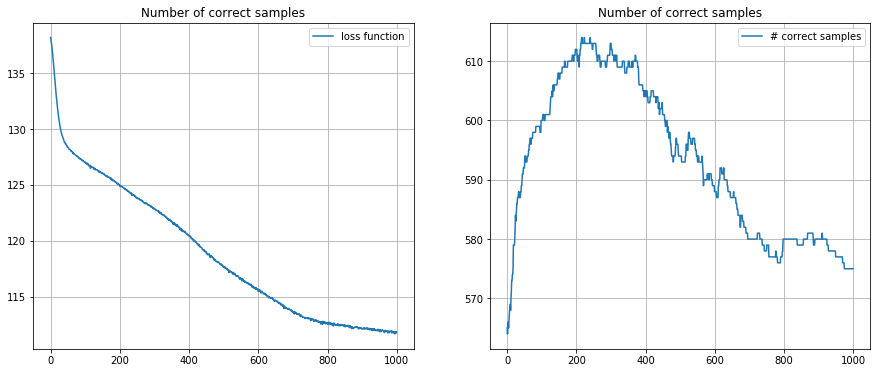

In [4]:
# create the model

#loss = LossBCE()




optimizers = [optim.SGDOptimizer, optim.SGDmomOptimizer, optim.AdamOptimizer, optim.BFGSOptimizer]
losses = [modules.LossMSE, modules.LossBCE]


lr = 0.005
loss_lists = []
train_accs = []
learning_rates=[1,0.1,0.01,0.001,0.0001,0.00001]
for (lr,num) in [(0.002,0),(0.0015,1),(0.002,2),(0.002,3)]:
    Lin1 = modules.Linear(2,25)
    Lin2 = modules.Linear(25,25)
    Lin3 = modules.Linear(25,2)
    act1 = modules.ReLU()
    act2 = modules.ReLU()
    act3 = modules.Tanh()
    act4 = modules.Sigmoid()
    layers = [
        Lin1,
        act1,
        Lin2,
        act2,
        Lin3,
        act3]
    loss = modules.LossMSE()
    model = modules.Sequential(layers, loss)
    optimizer = optimizers[num](model, lr) # 
    epochs = 1000
    mini_batch_size = 50
    loss_list, train_acc = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                              epochs, mini_batch_size, verbose = False)
    loss_lists.append(loss_list)
    train_accs.append(train_acc)

    print('optimizer: ',optimizer.name)
    print('learning rate: ',lr)
    print('minimum loss: ',min(loss_list))
    print('maximum accuracy: ',max(train_acc))
    print('On test: ', trainAndTest.test(model,test_input,test_target) )
    trainAndTest.plot_loss_accuracy(loss_list, train_acc)

100%|██████████| 1000/1000 [00:03<00:00, 255.57it/s]


optimizer:  SGD
learning rate:  0.002
minimum loss:  20.553586274385452
maximum accuracy:  985
On test:  980


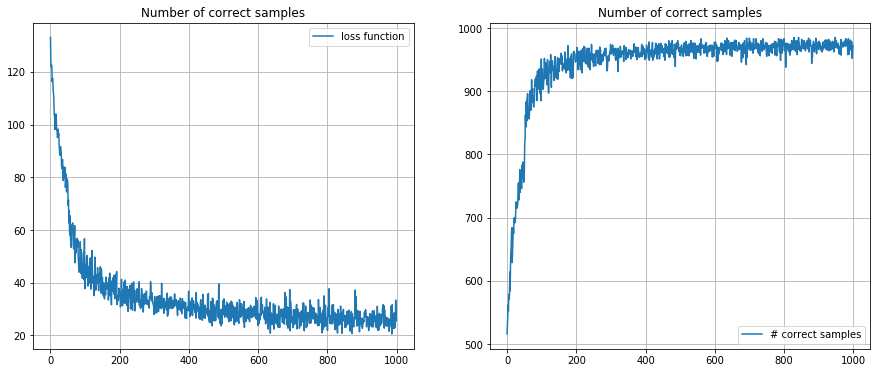

In [19]:
# SGD
lr = 0.002
Lin1 = modules.Linear(2,25)
Lin2 = modules.Linear(25,25)
Lin3 = modules.Linear(25,2)
act1 = modules.ReLU()
act2 = modules.ReLU()
act3 = modules.Tanh()
act4 = modules.Sigmoid()
layers = [
    Lin1,
    act1,
    Lin2,
    act2,
    Lin3,
    act3]
loss = modules.LossMSE()
model = modules.Sequential(layers, loss)
optimizer = optimizers[0](model, lr) # 
epochs = 1000
mini_batch_size = 50
loss_list_sgd, train_acc_sgd = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                          epochs, mini_batch_size, verbose = False)


print('optimizer: ',optimizer.name)
print('learning rate: ',lr)
print('minimum loss: ',min(loss_list_sgd))
print('maximum accuracy: ',max(train_acc_sgd))
print('On test: ', trainAndTest.test(model,test_input,test_target) )
trainAndTest.plot_loss_accuracy(loss_list_sgd, train_acc_sgd)

100%|██████████| 1000/1000 [00:04<00:00, 214.28it/s]


optimizer:  SGDmom
learning rate:  0.0002
minimum loss:  40.906975865364075
maximum accuracy:  980
On test:  953


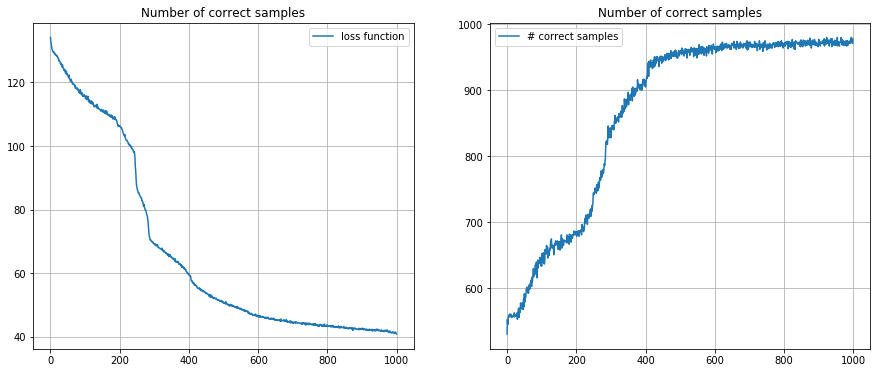

In [18]:
# SGD MOM
lr = 0.0002
Lin1 = modules.Linear(2,25)
Lin2 = modules.Linear(25,25)
Lin3 = modules.Linear(25,2)
act1 = modules.ReLU()
act2 = modules.ReLU()
act3 = modules.Tanh()
act4 = modules.Sigmoid()
layers = [
    Lin1,
    act1,
    Lin2,
    act2,
    Lin3,
    act3]
loss = modules.LossMSE()
model = modules.Sequential(layers, loss)
optimizer = optimizers[1](model, lr) # 
epochs = 1000
mini_batch_size = 50
loss_list_mom, train_acc_mom = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                          epochs, mini_batch_size, verbose = False)


print('optimizer: ',optimizer.name)
print('learning rate: ',lr)
print('minimum loss: ',min(loss_list_mom))
print('maximum accuracy: ',max(train_acc_mom))
print('On test: ', trainAndTest.test(model,test_input,test_target) )
trainAndTest.plot_loss_accuracy(loss_list_mom, train_acc_mom)

100%|██████████| 1000/1000 [00:09<00:00, 107.49it/s]


optimizer:  Adam
learning rate:  0.005
minimum loss:  6.952547548338771
maximum accuracy:  1000
On test:  961


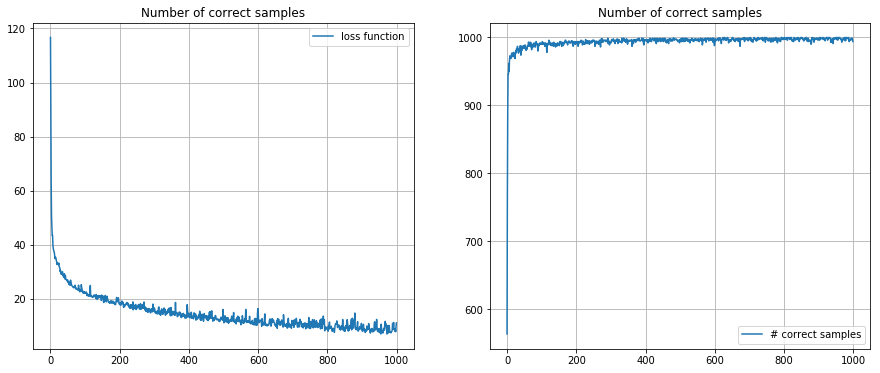

In [20]:
# adam
lr = 0.005
Lin1 = modules.Linear(2,25)
Lin2 = modules.Linear(25,25)
Lin3 = modules.Linear(25,2)
act1 = modules.ReLU()
act2 = modules.ReLU()
act3 = modules.Tanh()
act4 = modules.Sigmoid()
layers = [
    Lin1,
    act1,
    Lin2,
    act2,
    Lin3,
    act3]
loss = modules.LossMSE()
model = modules.Sequential(layers, loss)
optimizer = optimizers[2](model, lr) # 
epochs = 1000
mini_batch_size = 50
loss_list_adam, train_acc_adam = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                          epochs, mini_batch_size, verbose = False)


print('optimizer: ',optimizer.name)
print('learning rate: ',lr)
print('minimum loss: ',min(loss_list_adam))
print('maximum accuracy: ',max(train_acc_adam))
print('On test: ', trainAndTest.test(model,test_input,test_target) )
trainAndTest.plot_loss_accuracy(loss_list_adam, train_acc_adam)

100%|██████████| 1000/1000 [00:05<00:00, 170.31it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  31.969435811042786
maximum accuracy:  976
On test:  957


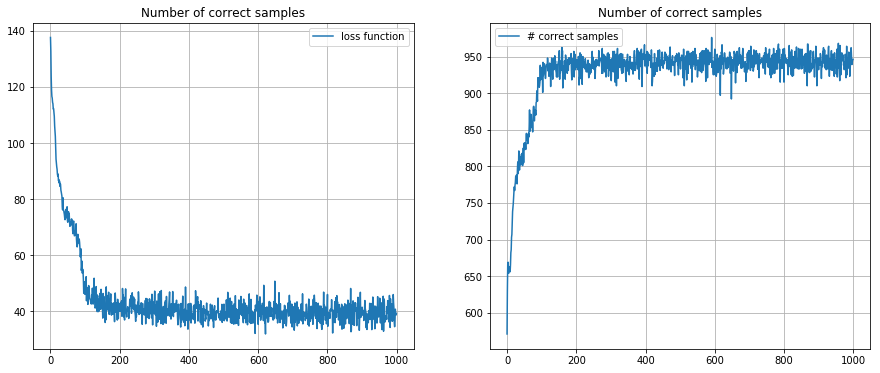

In [14]:
# BFGS
lr = 0.28
Lin1 = modules.Linear(2,25)
Lin2 = modules.Linear(25,25)
Lin3 = modules.Linear(25,2)
act1 = modules.ReLU()
act2 = modules.ReLU()
act3 = modules.Tanh()
act4 = modules.Sigmoid()
layers = [
    Lin1,
    act1,
    Lin2,
    act2,
    Lin3,
    act3]
loss = modules.LossMSE()
model = modules.Sequential(layers, loss)
optimizer = optimizers[3](model, lr) # 
epochs = 1000
mini_batch_size = 50

loss_list_BFGS_3, train_acc_BFGS_3 = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                          epochs, mini_batch_size, verbose = False)


print('optimizer: ',optimizer.name)
print('learning rate: ',lr)
print('minimum loss: ',min(loss_list_BFGS_3))
print('maximum accuracy: ',max(train_acc_BFGS_3))
print('On test: ', trainAndTest.test(model,test_input,test_target) )
trainAndTest.plot_loss_accuracy(loss_list_BFGS_3, train_acc_BFGS_3)

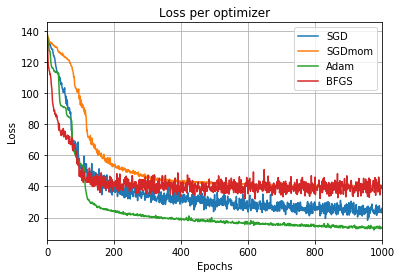

In [15]:
p0 = plt.figure(0)
loss_lists = [loss_list_sgd, loss_list_mom, loss_list_adam, loss_list_BFGS_3]
train_accs = [train_acc_sgd, train_acc_mom, train_acc_adam, train_acc_BFGS_3]
labels=['SGD','SGDmom','Adam','BFGS']
for i,loss_list in enumerate(loss_lists):
    plt.plot(loss_list, label=labels[i])
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,1000)
plt.ylabel('Loss')
plt.title('Loss per optimizer')
plt.show()
p0.savefig(PLOT_FOLDER+'loss per optimizer9')

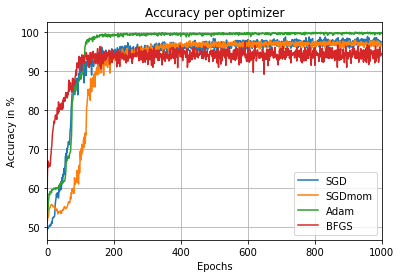

In [16]:
p1 = plt.figure(3)
labels=['SGD','SGDmom','Adam','BFGS']
for i,train_acc in enumerate(train_accs):
    plt.plot([x/train_input.size(0)*100 for x in train_acc], label=labels[i])
plt.grid()
plt.legend()
plt.xlabel('Epochs')
plt.xlim(0,1000)
plt.ylabel('Accuracy in %')
plt.title('Accuracy per optimizer')
plt.show()
p1.savefig(PLOT_FOLDER+'accuracy per optimizer9')

### For the variance

In [21]:
def write(filename,itemlist):
    with open(filename, 'wb') as fp:
        pickle.dump(itemlist, fp)



100%|██████████| 1000/1000 [00:06<00:00, 159.62it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  27.50987219810486
maximum accuracy:  992
On test:  969


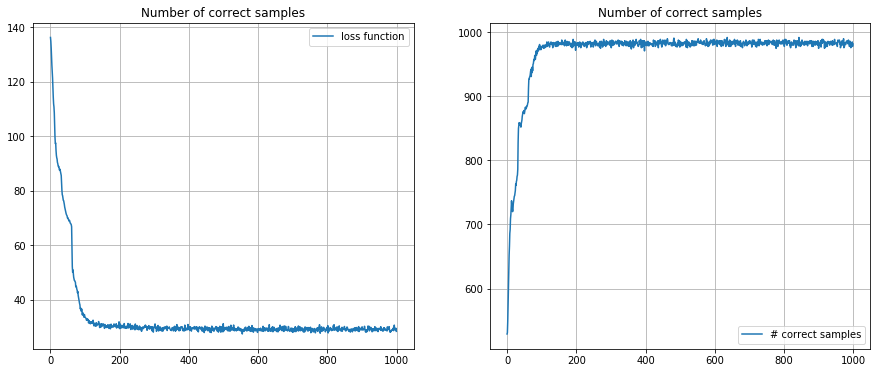

100%|██████████| 1000/1000 [00:06<00:00, 159.09it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  33.13227152824402
maximum accuracy:  979
On test:  903


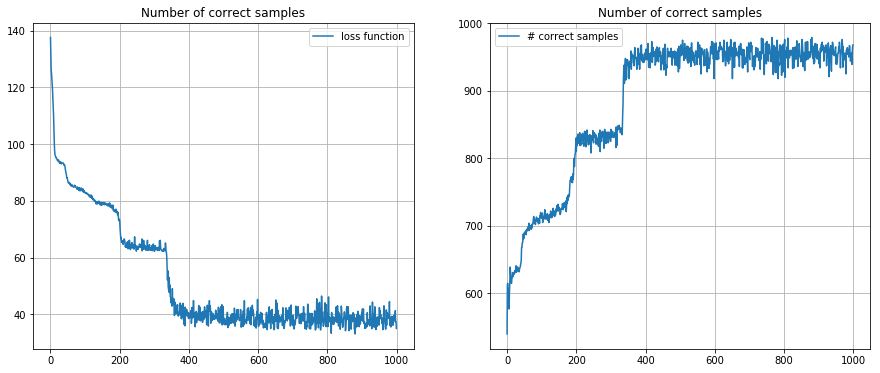

100%|██████████| 1000/1000 [00:07<00:00, 134.21it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  36.119771122932434
maximum accuracy:  976
On test:  928


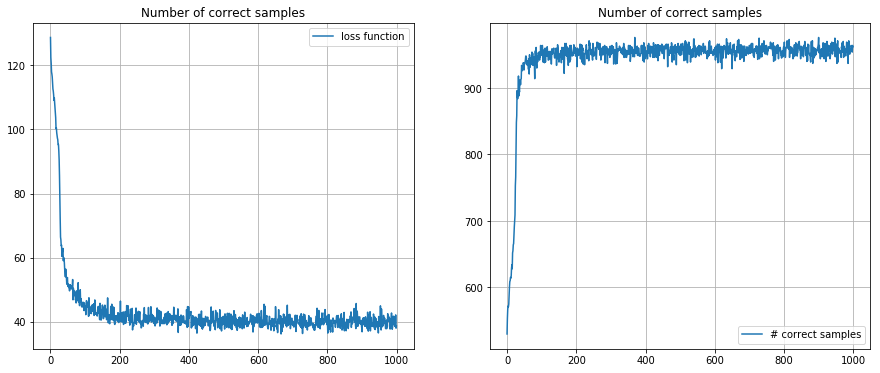

100%|██████████| 1000/1000 [00:08<00:00, 123.62it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  31.38431739807129
maximum accuracy:  978
On test:  975


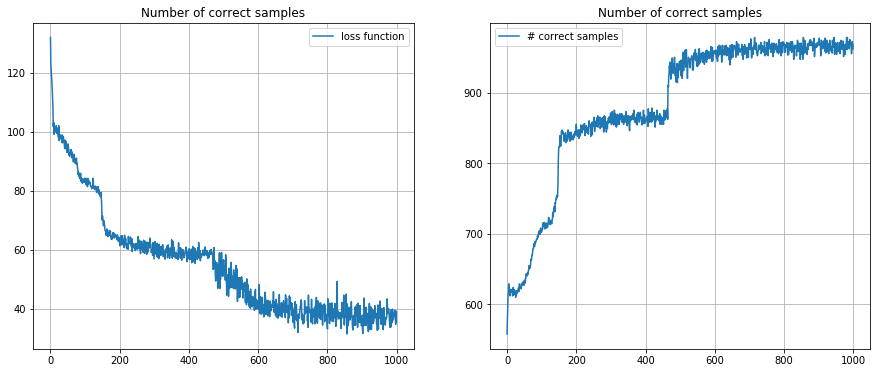

100%|██████████| 1000/1000 [00:07<00:00, 131.41it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  52.173351526260376
maximum accuracy:  943
On test:  931


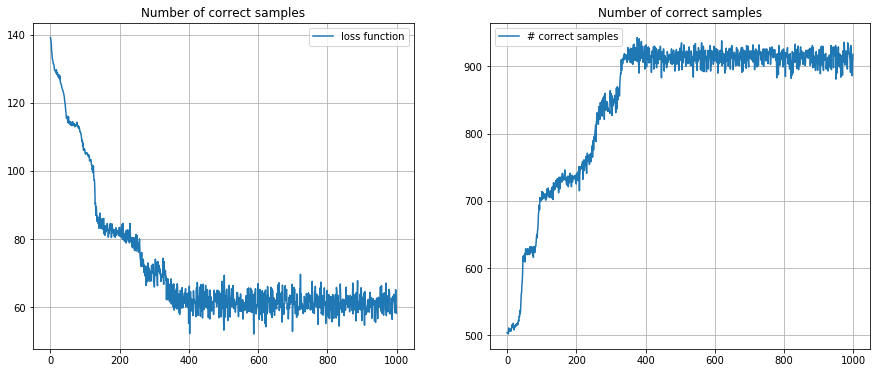

100%|██████████| 1000/1000 [00:06<00:00, 156.79it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  30.825713276863098
maximum accuracy:  982
On test:  956


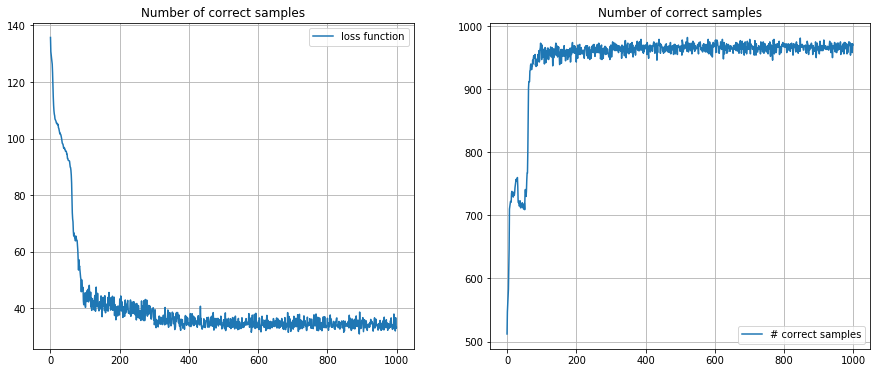

100%|██████████| 1000/1000 [00:05<00:00, 170.87it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  32.24541127681732
maximum accuracy:  982
On test:  956


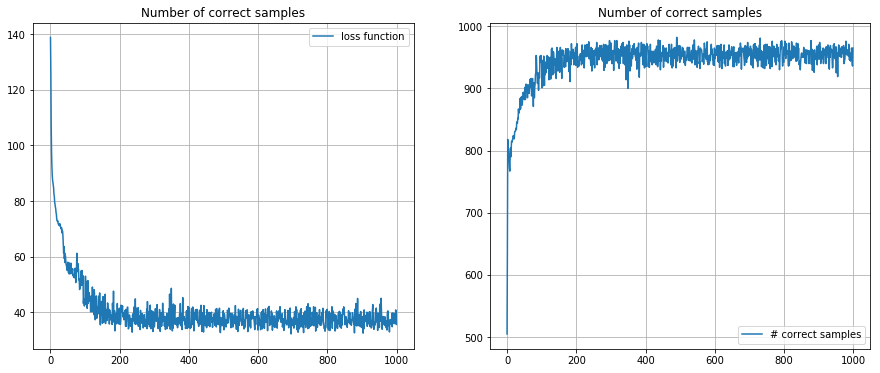

100%|██████████| 1000/1000 [00:05<00:00, 174.38it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  101.98349809646606
maximum accuracy:  614
On test:  480


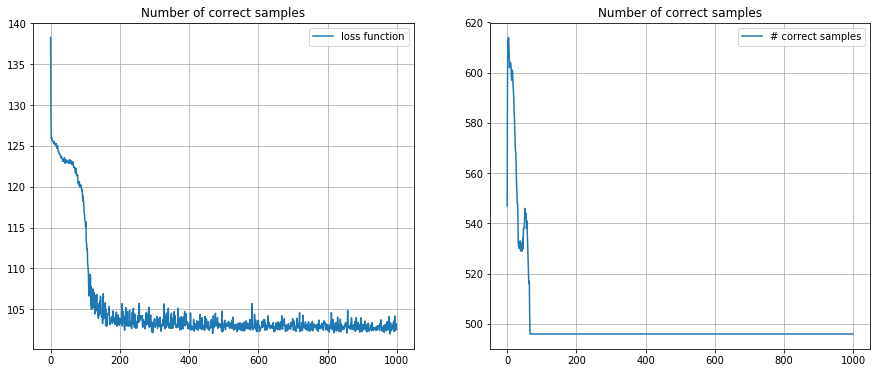

100%|██████████| 1000/1000 [00:05<00:00, 173.58it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  37.75949776172638
maximum accuracy:  968
On test:  956


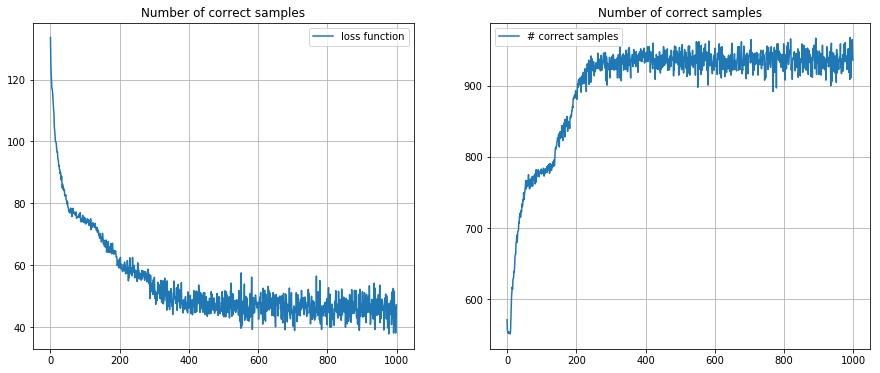

100%|██████████| 1000/1000 [00:05<00:00, 169.89it/s]


optimizer:  BFGS
learning rate:  0.28
minimum loss:  63.897594690322876
maximum accuracy:  840
On test:  837


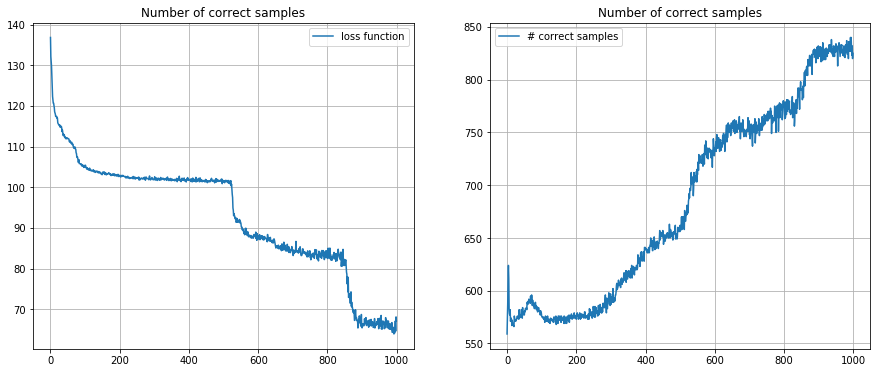

In [22]:
# adam
import numpy as np
import modules
my_loss_list = []
my_acc_list = []

for i in range(10):
    lr = 0.28
    Lin1 = modules.Linear(2,25)
    Lin2 = modules.Linear(25,25)
    Lin3 = modules.Linear(25,2)
    act1 = modules.ReLU()
    act2 = modules.ReLU()
    act3 = modules.Tanh()
    act4 = modules.Sigmoid()
    layers = [
        Lin1,
        act1,
        Lin2,
        act2,
        Lin3,
        act3]
    loss = modules.LossMSE()
    model = modules.Sequential(layers, loss)
    optimizer = optimizers[3](model, lr) # 
    epochs = 1000
    mini_batch_size = 50
    loss_list_adam, train_acc_adam = trainAndTest.train(model, optimizer, loss, train_input, train_target,\
                                              epochs, mini_batch_size, verbose = False)

    my_loss_list.append(np.array(loss_list_adam))
    my_acc_list.append(np.array(train_acc_adam))
    print('optimizer: ',optimizer.name)
    print('learning rate: ',lr)
    print('minimum loss: ',min(loss_list_adam))
    print('maximum accuracy: ',max(train_acc_adam))
    print('On test: ', trainAndTest.test(model,test_input,test_target) )
    trainAndTest.plot_loss_accuracy(loss_list_adam, train_acc_adam)

In [24]:
import pickle
write('losses_BFGS.p',my_loss_list)
write('acc_BFGS.p',my_acc_list)